In [1]:
"""
"""

'\n'

In [2]:
from neuralmonkey.classes.session import Session
import matplotlib.pyplot as plt
from neuralmonkey.scripts.load_and_save_locally import load_and_preprocess_single_session
import neuralmonkey.utils.monkeylogic as mkl
from neuralmonkey.classes.session import load_session_helper, load_mult_session_helper
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
DATE = 230921
animal = "Diego"

Searching using this string:
/mnt/Freiwald/ltian/recordings/*Diego*/*230921*/**
Found this many paths:
1
---
/mnt/Freiwald/ltian/recordings/Diego/230921/Diego-230921-104339
session:  0
Beh Sessions that exist on this date:  {230921: [(1, 'dirgrammardiego8e')]}
------------------------------
Loading this neural session: 0
Loading these beh expts: ['dirgrammardiego8e']
Loading these beh sessions: [1]
Using this beh_trial_map_list: [(1, 0)]
Searching using this string:
/mnt/Freiwald/ltian/recordings/*Diego*/*230921*/**
Found this many paths:
1
---
/mnt/Freiwald/ltian/recordings/Diego/230921/Diego-230921-104339
{'filename_components_hyphened': ['Diego', '230921', '104339'], 'basedirs': ['/mnt/Freiwald/ltian/recordings/Diego', '/mnt/Freiwald/ltian/recordings/Diego/230921'], 'basedirs_filenames': ['230921', 'Diego-230921-104339'], 'filename_final_ext': 'Diego-230921-104339', 'filename_final_noext': 'Diego-230921-104339'}
== PATHS for this expt: 
raws  --  /mnt/Freiwald/ltian/recordings/Diego

** Loading tank data from local (previusly cached)
== Done
== Trying to load events data
Loading this events (pd) locally to:  /gorilla1/neural_preprocess/recordings/Diego/230921/Diego-230921-104339/events_photodiode.pkl
_loadlocal_events DOESNT EXIST
== Done
== Loading spike times
** Loading spike data from local (previusly cached)
== Done
== Loading ml2 behavior
-- loaded presaved data: /mnt/Freiwald/kgupta/macaque_data/Diego/230921/230921_104258_dirgrammardiego8e_Diego_1.pkl
== Done
... Generated these...
self.BehTrialMapList [(1, 0)]
self.BehTrialMapListGood {0: (0, 1), 1: (0, 2), 2: (0, 3), 3: (0, 4), 4: (0, 5), 5: (0, 6), 6: (0, 7), 7: (0, 8), 8: (0, 9), 9: (0, 10), 10: (0, 11), 11: (0, 12), 12: (0, 13), 13: (0, 14), 14: (0, 15), 15: (0, 16), 16: (0, 17), 17: (0, 18), 18: (0, 19), 19: (0, 20), 20: (0, 21), 21: (0, 22), 22: (0, 23), 23: (0, 24), 24: (0, 25), 25: (0, 26), 26: (0, 27), 27: (0, 28), 28: (0, 29), 29: (0, 30), 30: (0, 31), 31: (0, 32), 32: (0, 33), 33: (0, 34), 34: (0,

Updating self.BehTrialMapList from
[(1, 0)]
to: 
[(4, 0)]
Old BehTrialMapListGood: 
{0: (0, 1), 1: (0, 2), 2: (0, 3), 3: (0, 4), 4: (0, 5), 5: (0, 6), 6: (0, 7), 7: (0, 8), 8: (0, 9), 9: (0, 10), 10: (0, 11), 11: (0, 12), 12: (0, 13), 13: (0, 14), 14: (0, 15), 15: (0, 16), 16: (0, 17), 17: (0, 18), 18: (0, 19), 19: (0, 20), 20: (0, 21), 21: (0, 22), 22: (0, 23), 23: (0, 24), 24: (0, 25), 25: (0, 26), 26: (0, 27), 27: (0, 28), 28: (0, 29), 29: (0, 30), 30: (0, 31), 31: (0, 32), 32: (0, 33), 33: (0, 34), 34: (0, 35), 35: (0, 36), 36: (0, 37), 37: (0, 38), 38: (0, 39), 39: (0, 40), 40: (0, 41), 41: (0, 42), 42: (0, 43), 43: (0, 44), 44: (0, 45), 45: (0, 46), 46: (0, 47), 47: (0, 48), 48: (0, 49), 49: (0, 50), 50: (0, 51), 51: (0, 52), 52: (0, 53), 53: (0, 54), 54: (0, 55), 55: (0, 56), 56: (0, 57), 57: (0, 58), 58: (0, 59), 59: (0, 60), 60: (0, 61), 61: (0, 62), 62: (0, 63), 63: (0, 64), 64: (0, 65), 65: (0, 66), 66: (0, 67), 67: (0, 68), 68: (0, 69), 69: (0, 70), 70: (0, 71), 71: (0, 72)

Extrcting data for trial 0
Extrcting data for trial 1
Extrcting data for trial 2
Extrcting data for trial 3
Extrcting data for trial 4
Extrcting data for trial 5
Extrcting data for trial 6
Extrcting data for trial 7
Extrcting data for trial 8
Extrcting data for trial 9
Extrcting data for trial 10
Extrcting data for trial 12
Extrcting data for trial 13
Extrcting data for trial 14
Extrcting data for trial 15
Extrcting data for trial 16
Extrcting data for trial 17
Extrcting data for trial 19
Extrcting data for trial 20
Extrcting data for trial 21
Extrcting data for trial 22
Extrcting data for trial 23
Extrcting data for trial 24
Extrcting data for trial 25
Extrcting data for trial 26
Extrcting data for trial 28
Extrcting data for trial 29
Extrcting data for trial 31
Extrcting data for trial 32
Extrcting data for trial 33
Extrcting data for trial 34
Extrcting data for trial 35
Extrcting data for trial 36
Extrcting data for trial 37
Extrcting data for trial 38
Extrcting data for trial 39
Ex

Extrcting data for trial 381
Extrcting data for trial 382
Extrcting data for trial 383
Extrcting data for trial 384
Extrcting data for trial 385
Extrcting data for trial 386
Extrcting data for trial 387
Extrcting data for trial 388
Extrcting data for trial 389
Extrcting data for trial 390
Extrcting data for trial 391
Extrcting data for trial 392
Extrcting data for trial 393
Extrcting data for trial 394
Extrcting data for trial 395
Extrcting data for trial 396
Extrcting data for trial 397
Extrcting data for trial 398
Extrcting data for trial 399
Extrcting data for trial 402
Extrcting data for trial 403
Extrcting data for trial 404
Extrcting data for trial 405
Extrcting data for trial 406
Extrcting data for trial 407
Extrcting data for trial 408
Extrcting data for trial 409
Extrcting data for trial 410
Extrcting data for trial 411
Extrcting data for trial 413
Extrcting data for trial 414
Extrcting data for trial 415
Extrcting data for trial 416
Extrcting data for trial 417
Extrcting data

Extrcting data for trial 853
Extrcting data for trial 855
Extrcting data for trial 856
Extrcting data for trial 857
Extrcting data for trial 858
Extrcting data for trial 860
Extrcting data for trial 861
Extrcting data for trial 862
Extrcting data for trial 863
Extrcting data for trial 864
Extrcting data for trial 865
Extrcting data for trial 866
Extrcting data for trial 867
Extrcting data for trial 868
Extrcting data for trial 871
Extrcting data for trial 872
Extrcting data for trial 873
Extrcting data for trial 874
Extrcting data for trial 875
Extrcting data for trial 876
Extrcting data for trial 877
Extrcting data for trial 892
Extrcting data for trial 893
Extrcting data for trial 894
Extrcting data for trial 895
Extrcting data for trial 896
Extrcting data for trial 897
Extrcting data for trial 898
Extrcting data for trial 899
Extrcting data for trial 900
Extrcting data for trial 901
Extrcting data for trial 902
Extracting _MapperSiteTrial2DatAllInd
trial:  0
DOING: datall_cleanup_ad

/home/lucast4/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping d

skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping d

skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping d

skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping differnetiation, stroke too short. giving NAN
skipping d

Modified D.Dat[epoch]
These counts for epochs levels: 
llCV3     209
UL        194
rndstr    133
base       67
Name: epoch, dtype: int64
These counts for epoch_rule_tasksequencer levels: 
llCV3     209
UL        194
rndstr    133
base       67
Name: epoch_rule_tasksequencer, dtype: int64
 
appended col to self.Dat:
epoch_color
Reassigned rules taking conjucntion of old rules x color instruction
New epochs
llCV3|0     209
UL|0        194
rndstr|0    133
base|0       67
Name: epoch_color, dtype: int64
For these epochs, replacing epoch with epoch_color:
[]
603
- starting/ending len (getting sequence):
603
603
--- Removing nans
start len: 603
- num names for each col
not removing nans, since columns=[]
ADded new column: supervision_online
Reassigned train/test, using key: supervision_online
and values:
Train =  [True]
Test =  [False]
 
New distribution of train/test:
test     343
train    260
Name: monkey_train_or_test, dtype: int64
Appended column: los_info
Appended self.Dat[superv_SEQUEN

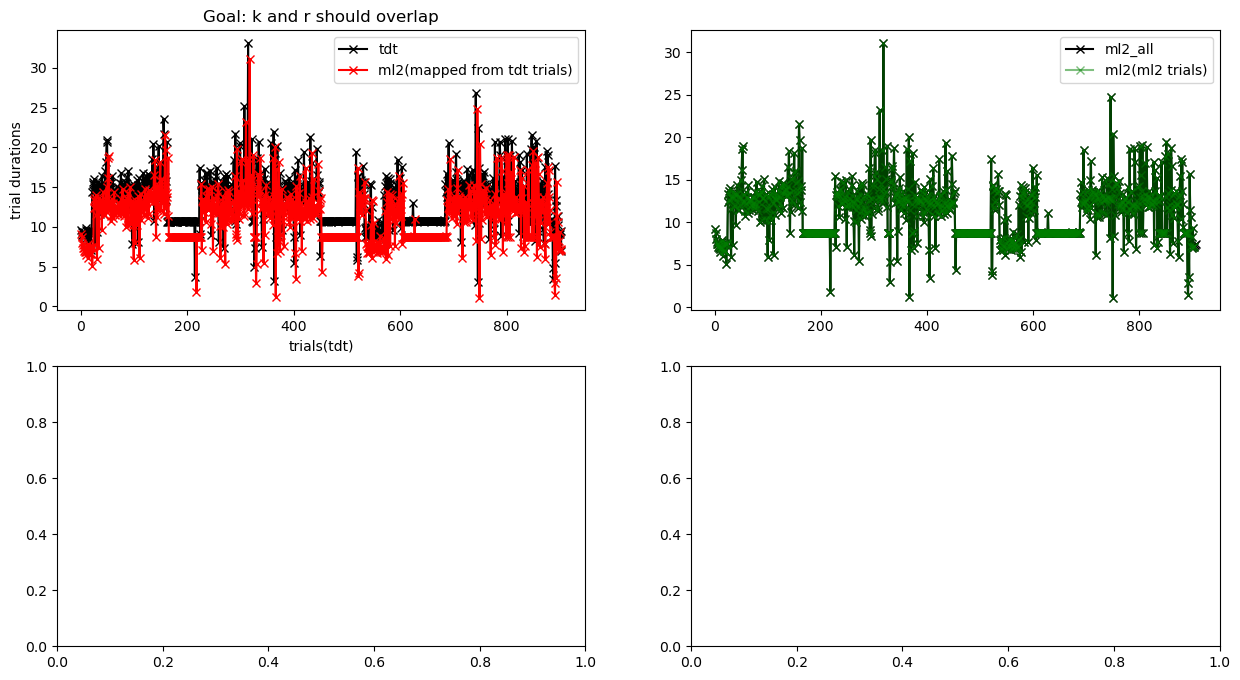

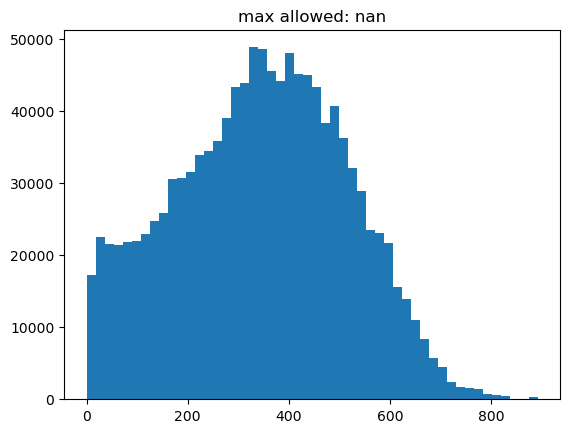

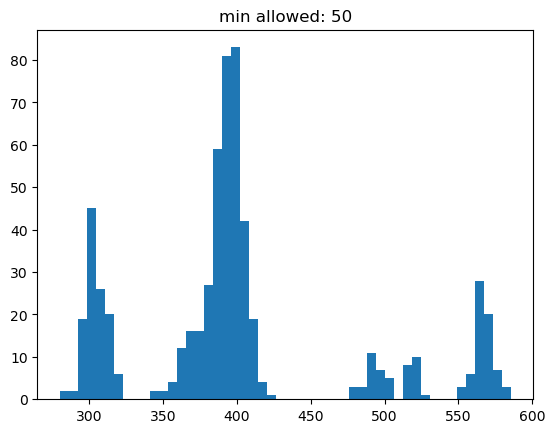

In [16]:
MS = load_mult_session_helper(DATE, animal, MINIMAL_LOADING=False)   
# MS = load_mult_session_helper(DATE, animal, MINIMAL_LOADING=True) 


In [ ]:
# Load a single session
sess = 1
sn = load_session_helper(DATE, rec_session=sess, animal=animal, MINIMAL_LOADING=False)

In [ ]:
sn = MS.SessionsList[0]

In [ ]:
MS.SessionsList

##### Fixation touch and done

In [ ]:
trial = 813
sn.beh_extract_touch_in_done_button(trial,  ploton=True)

In [ ]:
# sn.beh_extract_touch_in_fixation_square(trial, window_delta_pixels=48, ploton=True)
trial = 114
# sn.beh_extract_touch_in_fixation_square(trial, window_delta_pixels=52, ploton=True)
times, touch = sn.beh_extract_touch_in_fixation_square(trial, ploton=True)



##### Sanity checks across trialsm

In [ ]:
# Compare times of events, e..g, make sure done alway soccurs after 
for trial in sn.get_trials_list(True):
    print(trial)
    
    tmp = sn.events_get_times_as_array(trial, ["fixtch", "go", "doneb"])
    if np.isnan(tmp[2]):
        continue
    else:
#         print(tmp[2] - tmp[1])
        assert (tmp[2] - tmp[1])>0
        

In [ ]:
# trial = 594
event = "fixtch"
for trial in sn.get_trials_list(True):
    a = sn.events_get_time_using_photodiode(trial, list_events=[event])
    b = sn.events_get_time_using_photodiode(trial, list_events=[event], do_reextract_even_if_saved=True)
    print(trial, a, b, a==b)
    if len(a[event])>0:
        assert np.abs(a[event][0]-b[event][0])<0.01


##### Plot pd

In [ ]:
%matplotlib inline
trial = 114 
event = "fixtch"
sn.events_get_time_using_photodiode(trial, list_events=[event], plot_beh_code_stream = True, 
                                    do_reextract_even_if_saved=True)


In [ ]:
import numpy as np
np.linspace(-0.015, 0.055, 50)

In [ ]:
np.linspace(-0.045, 0.045, )

In [ ]:
np.linspace(1,10)


In [ ]:
print(10)

In [ ]:
sn.events_get_time_sorted(trial, ["fixcue", "fixtch"])[0]

In [ ]:
trial = 594
%matplotlib inline

sn.events_get_time_using_photodiode(trial, list_events=[event], plot_beh_code_stream = True, overwrite=True)

##### Problem: fixtouch even before fixation cue onset

In [ ]:
# Solution: detect cases. call the onset the same time as fixcue onset.

In [ ]:
for t in sn.get_trials_list(True):
    if sn.beh_check_touching_fixation_square_during_onset(t):
        print(t)

In [ ]:
touch.shape

#### Plot

In [ ]:
sn.extract_data_tank_epocs("camtrialoff")

In [ ]:
sn.DatTank["epocs"]

In [ ]:
# sn.DatTank["streams"]["Mic1"]
# sn.DatTank["streams"]["PhD2"]
# sn.DatTank["streams"]["Eyee"]
sn.DatTank["streams"]["PhDi"]

In [ ]:
%matplotlib inline
sites = sn.sitegetter_all()
sn.plotwrapper_raster_oneetrial_multsites(trial, sites[:10], overlay_trial_events=False,  overlay_trial_events_notpd=True)
# sn.plotwrapper_raster_oneetrial_multsites(trial, sites[:10], overlay_trial_events=True,  overlay_trial_events_notpd=False)



In [ ]:
trials = sn.get_trials_list(True, True)
sites = sn.sitegetter_all()
pre = -0.55
post = -0.05
sn.smoothedfr_extract_timewindow(trials, sites, "first_raise", pre, post)

sn.events_get_time_using_photodiode(269, list_events=["first_raise"], plot_beh_code_stream = True, overwrite=True)

In [ ]:
sn.plotwrapper_raster_oneetrial_multsites(269, sites[:10])

#####